# Transaction analysis of V3Migrator contract

In [1]:
import pandas as pd
df = pd.read_csv('v3migrator.csv')
df.head()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $2453.50731181246/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Method
0,0x6f8881703677512f21e9d9d6993c2793e3ab2eb169aa...,20208585,1719799703,2024-07-01 02:08:23,0xc01d277eef3f3914223317c5698822fb057968f5,0xa5644e29708357803b5a882d272c41cc0df92b34,NaN,0,0,0,0.002442,5.991877,3438.83,NaN,NaN,Multicall
1,0xe253fecd14f61f858f3ec4bdf52e9191148255309011...,20222841,1719971771,2024-07-03 01:56:11,0x6ca37ee898662bb83f28e067209265001f5d5943,0xa5644e29708357803b5a882d272c41cc0df92b34,NaN,0,0,0,0.002394,5.872872,3292.16,NaN,NaN,Multicall
2,0x8c3372161426e856240f1ca50248044de9f3017135c9...,20224432,1719990983,2024-07-03 07:16:23,0x5883f47ac4b5d152f829d300ece45b23f4b9dbc2,0xa5644e29708357803b5a882d272c41cc0df92b34,NaN,0,0,0,0.001809,4.437202,3292.16,NaN,NaN,Multicall
3,0xbc7c9c163a39f9f781940bfb11d33dfd4687082605a2...,20243036,1720215419,2024-07-05 21:36:59,0x6adaf04f4e2ba9cdde3ec143bdcf02ad830c1b7d,0xa5644e29708357803b5a882d272c41cc0df92b34,NaN,0,0,0,0.015213,37.325767,2982.07,NaN,NaN,Multicall
4,0xab1d532473404e2669d2ac49e1e38abb07d90dc2a3ae...,20248872,1720285811,2024-07-06 17:10:11,0x8909a5eb9dd309a3a3ab39fe5ac65a3a095654f4,0xa5644e29708357803b5a882d272c41cc0df92b34,NaN,0,0,0,0.002646,6.490867,3067.54,NaN,NaN,Multicall


Let us drop unnecessary columns

In [2]:
drop_columns = ['UnixTimestamp', 'ContractAddress', 'CurrentValue @ $2453.50731181246/Eth', 'TxnFee(ETH)', 'Historical $Price/Eth', 'ErrCode', 'Method']
df.drop(columns=drop_columns, axis=1, inplace=True)
df.head()

,Transaction Hash,Blockno,DateTime (UTC),From,To,Value_IN(ETH),Value_OUT(ETH),TxnFee(USD),Status
0,0x6f8881703677512f21e9d9d6993c2793e3ab2eb169aa...,20208585,2024-07-01 02:08:23,0xc01d277eef3f3914223317c5698822fb057968f5,0xa5644e29708357803b5a882d272c41cc0df92b34,0,0,5.991877,NaN
1,0xe253fecd14f61f858f3ec4bdf52e9191148255309011...,20222841,2024-07-03 01:56:11,0x6ca37ee898662bb83f28e067209265001f5d5943,0xa5644e29708357803b5a882d272c41cc0df92b34,0,0,5.872872,NaN
2,0x8c3372161426e856240f1ca50248044de9f3017135c9...,20224432,2024-07-03 07:16:23,0x5883f47ac4b5d152f829d300ece45b23f4b9dbc2,0xa5644e29708357803b5a882d272c41cc0df92b34,0,0,4.437202,NaN
3,0xbc7c9c163a39f9f781940bfb11d33dfd4687082605a2...,20243036,2024-07-05 21:36:59,0x6adaf04f4e2ba9cdde3ec143bdcf02ad830c1b7d,0xa5644e29708357803b5a882d272c41cc0df92b34,0,0,37.325767,NaN
4,0xab1d532473404e2669d2ac49e1e38abb07d90dc2a3ae...,20248872,2024-07-06 17:10:11,0x8909a5eb9dd309a3a3ab39fe5ac65a3a095654f4,0xa5644e29708357803b5a882d272c41cc0df92b34,0,0,6.490867,NaN


Let us check the total number of unique wallets engaged with this contract

In [21]:
df['From'].nunique()

139

Now, let us make seperate dataframes for each month in the given period

In [9]:
df['DateTime (UTC)'] = pd.to_datetime(df['DateTime (UTC)'])
july_df = df[(df['DateTime (UTC)'].dt.month == 7) & (df['DateTime (UTC)'].dt.year == 2024)]
august_df = df[(df['DateTime (UTC)'].dt.month == 8) & (df['DateTime (UTC)'].dt.year == 2024)]
september_df = df[(df['DateTime (UTC)'].dt.month == 9) & (df['DateTime (UTC)'].dt.year == 2024)]

In [10]:
july_df.head(3)

,Transaction Hash,Blockno,DateTime (UTC),From,To,Value_IN(ETH),Value_OUT(ETH),TxnFee(USD),Status
0,0x6f8881703677512f21e9d9d6993c2793e3ab2eb169aa...,20208585,2024-07-01 02:08:23,0xc01d277eef3f3914223317c5698822fb057968f5,0xa5644e29708357803b5a882d272c41cc0df92b34,0,0,5.991877,NaN
1,0xe253fecd14f61f858f3ec4bdf52e9191148255309011...,20222841,2024-07-03 01:56:11,0x6ca37ee898662bb83f28e067209265001f5d5943,0xa5644e29708357803b5a882d272c41cc0df92b34,0,0,5.872872,NaN
2,0x8c3372161426e856240f1ca50248044de9f3017135c9...,20224432,2024-07-03 07:16:23,0x5883f47ac4b5d152f829d300ece45b23f4b9dbc2,0xa5644e29708357803b5a882d272c41cc0df92b34,0,0,4.437202,NaN


In [11]:
august_df.head(3)

,Transaction Hash,Blockno,DateTime (UTC),From,To,Value_IN(ETH),Value_OUT(ETH),TxnFee(USD),Status
64,0x4fa113e0137e267045ba7ce03bffebb2b121a4bcfa11...,20432382,2024-08-01 08:03:35,0xeaab52dfed35feb28bd0c14c3055a175f6dd8080,0xa5644e29708357803b5a882d272c41cc0df92b34,0,0,9.550055,NaN
65,0xd1731115fafd1ec15971466b22daeac6fa75eeddf259...,20437100,2024-08-01 23:52:35,0xa4fe067c4646c7b7ca8944c60490fdb176e3acd3,0xa5644e29708357803b5a882d272c41cc0df92b34,0,0,52.543493,NaN
66,0xf970fcebf75dc42b833713abe3d028e50e055bd65336...,20439709,2024-08-02 08:35:59,0xd710cb52d4a79e1c0b1629c956c032d93bd46e5a,0xa5644e29708357803b5a882d272c41cc0df92b34,0,0,50.610223,NaN


In [12]:
september_df.head(3)

,Transaction Hash,Blockno,DateTime (UTC),From,To,Value_IN(ETH),Value_OUT(ETH),TxnFee(USD),Status
115,0xc32de9d09fd33b49ad3b1a7625861b7314ad1fa64a05...,20656168,2024-09-01 13:58:35,0xd613b3852ccf274d48e149f99c80a5c741269153,0xa5644e29708357803b5a882d272c41cc0df92b34,0,0,2.424167,NaN
116,0x77ad5d18bd61ebf028be75243f86e6fabad481aa8a68...,20675488,2024-09-04 06:41:35,0x7060a40452c72c21499c5f22265bb8d37a2c3b73,0xa5644e29708357803b5a882d272c41cc0df92b34,0,0,21.082238,NaN
117,0x63c17b5dd01588ab10704470f273423e75d29d08b45f...,20675854,2024-09-04 07:54:47,0x7060a40452c72c21499c5f22265bb8d37a2c3b73,0xa5644e29708357803b5a882d272c41cc0df92b34,0,0,21.650260,NaN


Now let us check how many unique wallets engaged in each month

In [14]:
n_july = july_df['From'].nunique()
n_august = august_df['From'].nunique()
n_september = september_df['From'].nunique()
(n_july, n_august, n_september)

(56, 49, 36)

Let us visualize this with the help of a simple bar graph

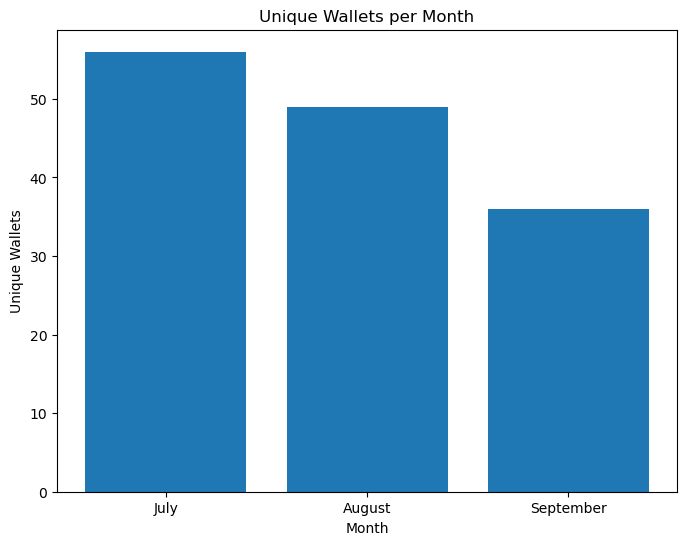

In [15]:
import matplotlib.pyplot as plt
months = ['July', 'August', 'September']
unique_wallets = [n_july, n_august, n_september]
plt.figure(figsize=(8, 6))
plt.bar(months, unique_wallets)
plt.xlabel('Month')
plt.ylabel('Unique Wallets')
plt.title('Unique Wallets per Month')
plt.show()

Now let us find the intersection of these unique users in each month, to understand whether they are consistently using the platform every month

In [16]:
july_wallets = set(july_df['From'].unique())
august_wallets = set(august_df['From'].unique())
september_wallets = set(september_df['From'].unique())
july_august = july_wallets.intersection(august_wallets)
august_september = august_wallets.intersection(september_wallets)
july_september = july_wallets.intersection(september_wallets)
all_three = july_wallets.intersection(august_wallets).intersection(september_wallets)
print(f"July-August intersection: {len(july_august)}")
print(f"August-September intersection: {len(august_september)}")
print(f"July-September intersection: {len(july_september)}")
print(f"All three months intersection: {len(all_three)}")

July-August intersection: 1
August-September intersection: 1
July-September intersection: 0
All three months intersection: 0


Let us visualize this using a Venn Diagram

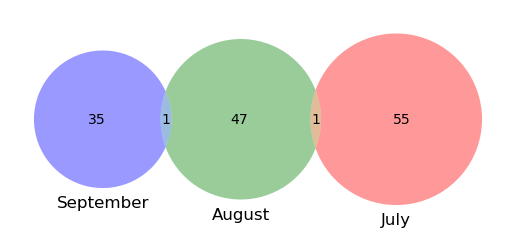

In [19]:
from matplotlib_venn import venn3
venn3([july_wallets, august_wallets, september_wallets], ('July', 'August', 'September'))
plt.show()